# Quick Start

## Project Instructions

This project is from DataCamp. Use the `faang_stocks.csv` dataset to complete the following analysis:

1. **Expected Returns and Annualized Sharpe Ratio**:
   - Calculate the expected returns and the annualized Sharpe ratio of an equally-weighted portfolio.
   - Assume the risk-free rate is 0%.
   - Store your answers as float variables called `benchmark_exp_return` and `benchmark_sharpe_ratio`.

2. **Minimize Volatility**:
   - Find a portfolio that minimizes volatility using mean-variance optimization.
   - Store the volatility of the portfolio as a float variable called `mv_portfolio_vol`.
   - Store the portfolio weights as a pandas Series called `mv_portfolio`.
   - Use the tickers as index.

3. **Maximize Sharpe Ratio**:
   - Find a portfolio that maximizes the Sharpe ratio using mean-variance optimization.
   - Keep the risk-free rate at 0%.
   - Store the Sharpe ratio (annualized) of the portfolio as a float variable called `ms_portfolio_sharpe`.
   - Store the portfolio weights as a pandas Series called `ms_portfolio`.
   - Use one! The code is correct.


In [1]:

# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Setting the plotting style to an available style
# Define the tickers
tickers = ["AAPL", "AMZN", "GOOGL", "META", "NFLX"]

# Download the stock prices
stock_prices_df = yf.download(tickers, start="2020-01-02", end="2024-11-17")['Adj Close']

# Display the first few rows of the dataframe
print(stock_prices_df.head())


[*********************100%***********************]  5 of 5 completed

Ticker                          AAPL       AMZN      GOOGL        META  \
Date                                                                     
2020-01-02 00:00:00+00:00  72.795998  94.900497  68.264961  209.150269   
2020-01-03 00:00:00+00:00  72.088318  93.748497  67.907845  208.043610   
2020-01-06 00:00:00+00:00  72.662697  95.143997  69.717865  211.961807   
2020-01-07 00:00:00+00:00  72.320984  95.343002  69.583206  212.420410   
2020-01-08 00:00:00+00:00  73.484360  94.598503  70.078476  214.573944   

Ticker                           NFLX  
Date                                   
2020-01-02 00:00:00+00:00  329.809998  
2020-01-03 00:00:00+00:00  325.899994  
2020-01-06 00:00:00+00:00  335.829987  
2020-01-07 00:00:00+00:00  330.750000  
2020-01-08 00:00:00+00:00  339.260010  


## Stock Price Plot

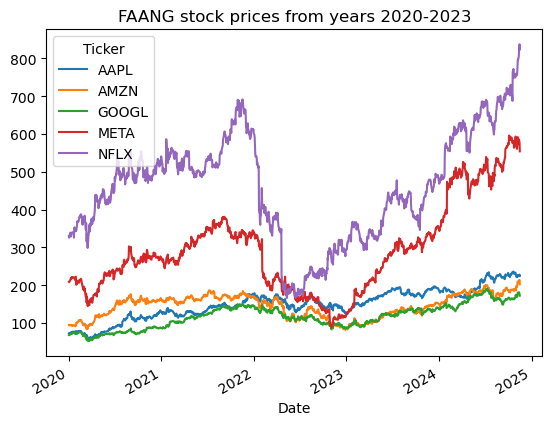

In [2]:
# Plotting the stock prices
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

# Computing Simple Returns
The formula for calculating simple returns (also known as arithmetic returns) is:

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

Where:
- \( R_t \) is the return at time \( t \).
- \( P_t \) is the price at time \( t \).
- \( P_{t-1} \) is the price at time \( t-1 \).

In Python, you can calculate simple returns using the `pct_change()` method from pandas, which computes the percentage change between the current and priorge().dropna()


In [3]:
returns_df = stock_prices_df.pct_change().dropna()
print(returns_df)


Ticker                         AAPL      AMZN     GOOGL      META      NFLX
Date                                                                       
2020-01-03 00:00:00+00:00 -0.009721 -0.012139 -0.005231 -0.005291 -0.011855
2020-01-06 00:00:00+00:00  0.007968  0.014886  0.026654  0.018834  0.030469
2020-01-07 00:00:00+00:00 -0.004703  0.002092 -0.001931  0.002164 -0.015127
2020-01-08 00:00:00+00:00  0.016086 -0.007809  0.007118  0.010138  0.025729
2020-01-09 00:00:00+00:00  0.021241  0.004799  0.010498  0.014311 -0.010611
...                             ...       ...       ...       ...       ...
2024-11-11 00:00:00+00:00 -0.012029 -0.006437  0.011214 -0.010469  0.013081
2024-11-12 00:00:00+00:00  0.000000  0.010008  0.007042  0.002829  0.017456
2024-11-13 00:00:00+00:00  0.003969  0.024843 -0.015086 -0.008242  0.013386
2024-11-14 00:00:00+00:00  0.013770 -0.012237 -0.018448 -0.004897  0.008176
2024-11-15 00:00:00+00:00 -0.014109 -0.041942 -0.017599 -0.039989 -0.015885

[1227 rows 

### Equally Weighted Portfolio

An equally weighted portfolio assigns the same weight to each asset in the portfolio. If you have \( n \) assets, the weight for each asset \( w_i \) is given by:

$$ w_i = \frac{1}{n} $$

The portfolio return \( R_p \) is the weighted sum of the individual asset returns \( R_i \):

$$ R_p = \sum_{i=1}^{n} w_i R_i $$

The expected portfolio return is the average of the portfolio returns over a period of time.

The Sharpe ratio is calculated as:

$$ \text{Sharpe Ratio} = \frac{\text{Expected Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Standard Deviation}} $$


In [4]:
##Daily simple return
# Calculate the number of assets
num_assets = len(stock_prices_df.columns)

# Calculate the 1/n portfolio weights
portfolio_weights = [1 / num_assets] * num_assets

# Calculate daily returns
returns_df = stock_prices_df.pct_change().dropna()

# Calculate the portfolio returns of the 1/n portfolio
portfolio_returns = returns_df.dot(portfolio_weights)

# Calculate the expected portfolio return (daily)
benchmark_exp_return_daily = portfolio_returns.mean()

print(benchmark_exp_return_daily)


0.0010700842360142526


### Annualizing Daily Return and Volatility

The formula for annualizing daily return is:

$$ R_{\text{annual}} = R_{\text{daily}} \times 252 $$

Where:
- \( R_{\text{annual}} \) is the annualized return.
- \( R_{\text{daily}} \) is the daily return.
- 252 is the number of trading days in a year.

The formula for annualizing daily volatility is:

$$ \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252} $$

Where:
- \( \sigma_{\text{annual}} \) is the annualized volatility.
- \( \sigma_{\text{daily}} \) is the daily volatility.
- \( \sqrt{252} \) is the square root of the number of trading days in a year.

### Sharpe Ratio

The formula for the Sharpe ratio is:

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

Where:
- \( R_p \) is the expected portfolio return.
- \( R_f \) is the risk-free rate.
- \( \sigma_p \) is the portfolio standard deviation (volatility).
g days in a year.


In [5]:
# Assuming Rf is zero
# Calculate the expected portfolio return (annualized)
benchmark_exp_return_annualized = benchmark_exp_return_daily * 252

# Calculate the portfolio's Sharpe ratio (daily)
benchmark_sharpe_ratio_daily = portfolio_returns.mean() / portfolio_returns.std()

# Calculate the portfolio's Sharpe ratio (annualized)
benchmark_sharpe_ratio_annualized = benchmark_exp_return_annualized / (portfolio_returns.std() * np.sqrt(252))

# Calculate the portfolio's volatility (annualized)
portfolio_volatility_annualized = portfolio_returns.std() * np.sqrt(252)

# Create a DataFrame for easy display
results = pd.DataFrame({
    "Metric": [
        "Expected Portfolio Return (Daily)",
        "Expected Portfolio Return (Annualized)",
        "Annualized Sharpe Ratio",
        "Annualized Volatility"
    ],
    "Value": [
        benchmark_exp_return_daily,
        benchmark_exp_return_annualized,
        benchmark_sharpe_ratio_annualized,
        portfolio_volatility_annualized
    ]
})

# Display the table in Jupyter Notebook
results


,Metric,Value
0,Expected Portfolio Return (Daily),0.001070
1,Expected Portfolio Return (Annualized),0.269661
2,Annualized Sharpe Ratio,0.873194
3,Annualized Volatility,0.308822


### Task 2: Minimize Volatility

To find a portfolio that minimizes volatility using mean-variance optimization, we follow these steps:

1. **Calculate the Annualized Expected Returns**:
   - The annualized expected returns are calculated by multiplying the mean of the daily returns by 252 (the number of trading days in a year):
     $$ \mu = \mathbb{E}[R_{\text{daily}}] \times 252 $$

2. **Calculate the Annualized Covariance Matrix**:
   - The covariance matrix of the returns is also annualized by multiplying the daily covariance matrix by 252:
     $$ \Sigma = \text{Cov}(R_{\text{daily}}) \times 252 $$

3. **Mean-Variance Optimization**:
   - We use mean-variance optimization to find the portfolio weights \( w \) that minimize the portfolio's volatility. This involves solving the following optimization problem:
     $$ \min_w \sqrt{w^T \Sigma w} $$
   - Subject to the constraint that the sum of the weights equals 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

4. **Store the Portfolio Weights**:
   - The optimized portfolio weights are stored in a pandas Series called `mv_portfolio`.

5. **Calculate the Minimized Volatility**:
   - The minimized volatility of the portfolio is given by:
     $$ \sigma_{\text{min}} = \sqrt{w^T \Sigma w} $$
   - This value is stored as a float variable called `mv_portfolio_vol`.

### Detailed Matrix Formula

To minimize the portfolio's volatility, we solve the following optimization problem:

1. **Objective Function**:
   - Minimize the portfolio's variance:
     $$ \min_w w^T \Sigma w $$

2. **Constraints**:
   - The sum of the weights must equal 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

3. **Lagrangian Function**:
   - To solve this constrained optimization problem, we use the Lagrangian function:
     $$ \mathcal{L}(w, \lambda) = w^T \Sigma w + \lambda (1 - \sum_{i=1}^{n} w_i) $$

4. **First-Order Conditions**:
   - Taking the derivative of the Lagrangian function with respect to \( w \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial w} = 2 \Sigma w - \lambda \mathbf{1} = 0 $$
   - Taking the derivative of the Lagrangian function with respect to \( \lambda \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \sum_{i=1}^{n} w_i = 0 $$

5. **Solving for Weights**:
   - Solving the system of equations, we get the optimal weights \( w \):
     $$ w = \frac{\Sigma^{-1} \mathbf{1}}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}} $$

By following these steps, we can construct a portfolio that minimizes volatility, providing a more stable investment option.


In [6]:
# Calculate the annualized expected returns and the covariance matrix
avg_returns = returns_df.mean() * 252
cov_mat = returns_df.cov() * 252

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that minimize volatility
weights = ef.min_volatility()
mv_portfolio = pd.Series(weights, index=stock_prices_df.columns)

# Find the minimized volatility
mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]

# Create a DataFrame to display the portfolio weights and minimized volatility
mv_results = pd.DataFrame({
    "Metric": [
        "Minimized Volatility"
    ],
    "Value": [
        f"{mv_portfolio_vol:.4f}"  # Display volatility with four decimals
    ]
})

# Display the portfolio weights separately in a clean format
print("Minimized Volatility Portfolio Weights:")
print(mv_portfolio)

# Display the minimized volatility in a clean format
print(f"\nMinimized Volatility: {mv_portfolio_vol:.4f}")

# If you want to return the results in a more readable format in Jupyter, use the following line:
mv_results


Minimized Volatility Portfolio Weights:
Ticker
AAPL     0.415184
AMZN     0.150616
GOOGL    0.353269
META     0.000000
NFLX     0.080932
dtype: float64

Minimized Volatility: 0.2868


,Metric,Value
0,Minimized Volatility,0.2868


### Task 3: Maximize Sharpe Ratio

To find a portfolio that maximizes the Sharpe ratio using mean-variance optimization, we follow these steps:

1. **Calculate the Annualized Expected Returns**:
   - The annualized expected returns are calculated by multiplying the mean of the daily returns by 252 (the number of trading days in a year):
     $$ \mu = \mathbb{E}[R_{\text{daily}}] \times 252 $$

2. **Calculate the Annualized Covariance Matrix**:
   - The covariance matrix of the returns is also annualized by multiplying the daily covariance matrix by 252:
     $$ \Sigma = \text{Cov}(R_{\text{daily}}) \times 252 $$

3. **Mean-Variance Optimization**:
   - We use mean-variance optimization to find the portfolio weights \( w \) that maximize the Sharpe ratio. This involves solving the following optimization problem:
     $$ \max_w \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} $$
   - Subject to the constraint that the sum of the weights equals 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

4. **Store the Portfolio Weights**:
   - The optimized portfolio weights are stored in a pandas Series called `ms_portfolio`.

5. **Calculate the Annualized Sharpe Ratio**:
   - The annualized Sharpe ratio of the portfolio is given by:
     $$ \text{Sharpe Ratio}_{\text{annual}} = \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} \times \sqrt{252} $$
   - This value is stored as a float variable called `ms_portfolio_sharpe`.

### Detailed Matrix Formula

To maximize the portfolio's Sharpe ratio, we solve the following optimization problem:

1. **Objective Function**:
   - Maximize the Sharpe ratio:
     $$ \max_w \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} $$

2. **Constraints**:
   - The sum of the weights must equal 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

3. **Lagrangian Function**:
   - To solve this constrained optimization problem, we use the Lagrangian function:
     $$ \mathcal{L}(w, \lambda) = \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} + \lambda (1 - \sum_{i=1}^{n} w_i) $$

4. **First-Order Conditions**:
   - Taking the derivative of the Lagrangian function with respect to \( w \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial w} = \frac{\mu - R_f}{\sqrt{w^T \Sigma w}} - \frac{w^T \mu - R_f}{2(w^T \Sigma w)^{3/2}} \Sigma w - \lambda \mathbf{1} = 0 $$
   - Taking the derivative of the Lagrangian function with respect to \( \lambda \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \sum_{i=1}^{n} w_i = 0 $$

5. **Solving for Weights**:
   - Solving the system of equations, we get the optimal weights \( w \):
     $$ w = \frac{\Sigma^{-1} (\mu - R_f)}{\mathbf{1}^T \Sigma^{-1} (\mu - R_f)} $$

By following these steps, we can construct a portfolio that maximizes the Sharpe ratio, providing an optimal balance between return and risk.
atility, providing a more stable investment option.


In [7]:
# Alternative approach to get the expected returns and the covariance matrix
avg_returns = expected_returns.mean_historical_return(stock_prices_df, compounding=False)
cov_mat = risk_models.sample_cov(stock_prices_df)

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that maximize the Sharpe ratio
weights = ef.max_sharpe(risk_free_rate=0)
ms_portfolio = pd.Series(weights, index=stock_prices_df.columns)

# Find the maximized Sharpe ratio
ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate=0)[2]

# Create a DataFrame for the results
results = pd.DataFrame({
    "Ticker": stock_prices_df.columns,
    "Optimal Weight": ms_portfolio
})

# Print results
print("Maximized Sharpe Ratio Portfolio Weights:\n", results)
print("\nMaximized Sharpe Ratio: {:.4f}".format(ms_portfolio_sharpe))


Maximized Sharpe Ratio Portfolio Weights:
        Ticker  Optimal Weight
Ticker                       
AAPL     AAPL        0.586185
AMZN     AMZN        0.000000
GOOGL   GOOGL        0.183554
META     META        0.064763
NFLX     NFLX        0.165497

Maximized Sharpe Ratio: 0.9428


### Conclusion

In this project, we analyzed the risk and return characteristics of a portfolio consisting of FAANG stocks (AAPL, AMZN, GOOGL, META, NFLX) using historical data from January 2, 2020, to November 17, 2024. We performed key tasks such as calculating expected returns and the annualized Sharpe ratio, minimizing volatility, and maximizing the Sharpe ratio. By leveraging historical data and optimization techniques, we provided practical tools for informed decision-making in portfolio management. This project highlights the importance of quantitative analysis in achieving optimal investment outcomes.
